In [1]:
# Here we would extract information about the movies and check for movies with high variance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('../data/ml-latest-small/clear-rating.csv')

In [4]:
df.shape

(100004, 5)

In [5]:
UMID = list(set(df.movieId))

In [6]:
UMID.sort()

In [7]:
count = []; mu = []; sig = []; var = []
for i in UMID:
    X = df[df.movieId==i]
    Score = np.array(X.rating)
    del X
    
    c = Score.shape[0]
    mean = np.mean(Score)
    stddev = np.std(Score)
    v = np.var(Score)
    
    #Count, mean, std-dev, var of each movie
    count.append(c); mu.append(mean) 
    sig.append(stddev); var.append(v)

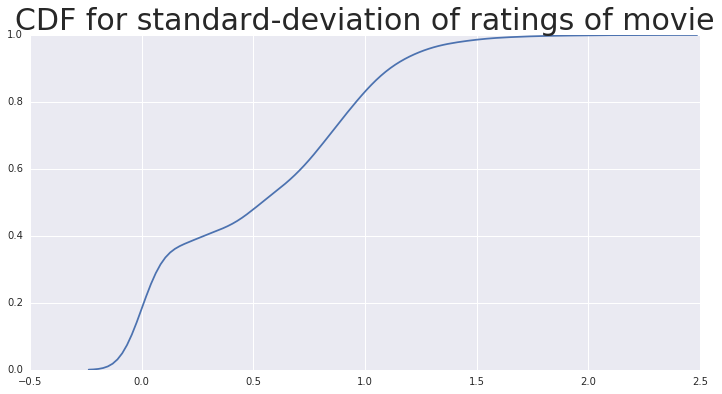

In [8]:
# will plot the cdf of the variance of the ratings

plt.figure(figsize=(12,6))
sns.kdeplot(sig,cumulative=True)
plt.title('CDF for standard-deviation of ratings of movie',fontdict={'fontsize':30})
plt.show()

In [9]:
max(sig)

2.25

In [10]:
# Creating a new df of the information

movinf = pd.DataFrame({'movieId':UMID,'Mov-Freq':count,'Mov-Mean':mu,'Mov-std':sig,'Mov-var':var})

In [11]:
movinf.to_csv('../data/ml-latest-small/movie-info.csv')